In [1]:
# %matplotlib notebook
import sacc
from matplotlib import pyplot as plt

s = sacc.Sacc.load_fits("/mnt/extraspace/gravityls_3/sacc_files/cls_FD_covG.fits")
for dt in ['cl_0b', 'cl_eb', 'cl_be', 'cl_bb']:
    s.remove_selection(data_type=dt)

# With no shifted N(z) by dz mean prior

## Check covariance

In [2]:
s_dzmarg = sacc.Sacc.load_fits("./cls_FD_covG_cls_NzMarg_cov_p0.001.fits")
covf = np.load("./cls_FD_covG_covNzMarg_p0.001.npz")
cov_dzmarg = covf['nz_marg']
cov_dz = covf['cov_dz']

In [5]:
np.max(np.abs(s.covariance.covmat + cov_dzmarg - s_dzmarg.covariance.covmat))

0.0

In [17]:
dt = 'cl_00'
trs = ("eBOSS__0", "eBOSS__0")
_, _, cov1, ix1 = s.get_ell_cl(dt, *trs, return_ind=True, return_cov=True)
_, _, cov2, ix2 = s_dzmarg.get_ell_cl(dt, *trs, return_ind=True, return_cov=True)
print(np.max(np.abs(cov1 - cov2)), np.all(ix1 == ix2))
print(ix1)

0.0 True
[661 662 663 664 665 666 667 668 669 670 671 672 673 674 675 676 677 678
 679 680 681 682 683 684 685 686 687 688 689 690 691 692 693 694 695 696
 697 698 699]


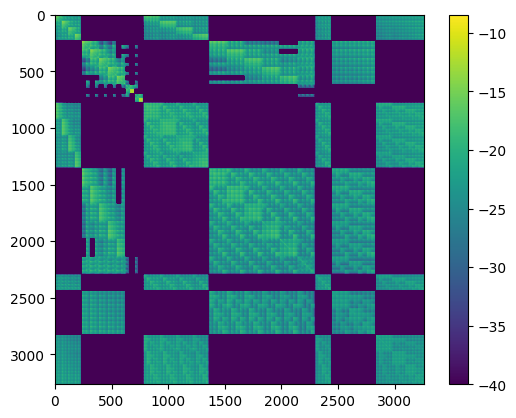

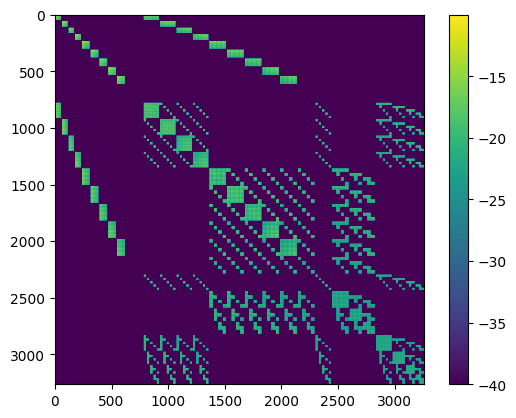

In [18]:
plt.imshow(np.log10(np.abs(s.covariance.covmat)+1e-100), vmin=-40)
plt.colorbar()
plt.show()

plt.imshow(np.log10(np.abs(s_dzmarg.covariance.covmat)+1e-100), vmin=-40)
plt.colorbar()
plt.show()

plt.imshow(np.log10(np.abs(cov_dzmarg)+1e-100), vmin=-40)
plt.colorbar()
plt.show()

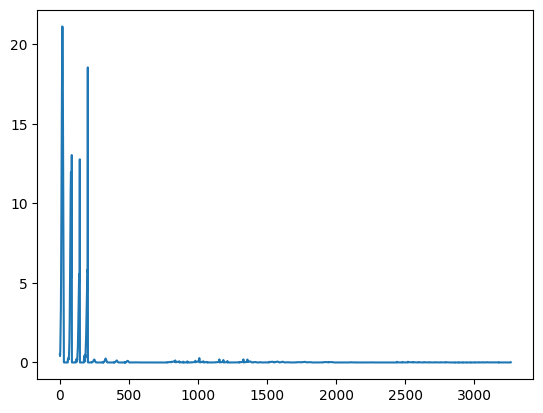

In [30]:
plt.plot(np.diag(s_dzmarg.covariance.covmat) / np.diag(s.covariance.covmat) - 1)
plt.show()
plt.close()

## Check T

In [22]:
Tmat = np.load("./cls_FD_covG_T_p0.001.npz")["Tmat"]
covf = np.load("./cls_FD_covG_covNzMarg_p0.001.npz")
cov_dzmarg = covf['nz_marg']
cov_dz = covf['cov_dz']

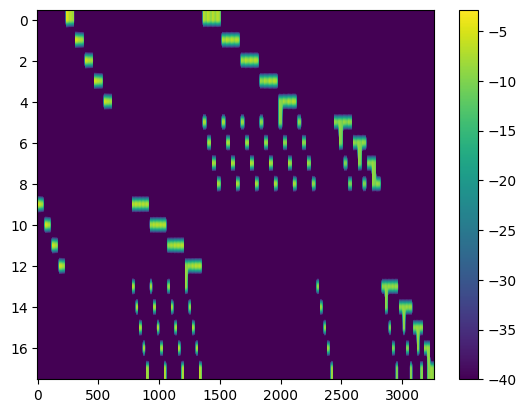

In [29]:
plt.imshow(np.log10(np.abs(Tmat) + 1e-100), vmin=-40, aspect='auto')
plt.colorbar()
plt.show()

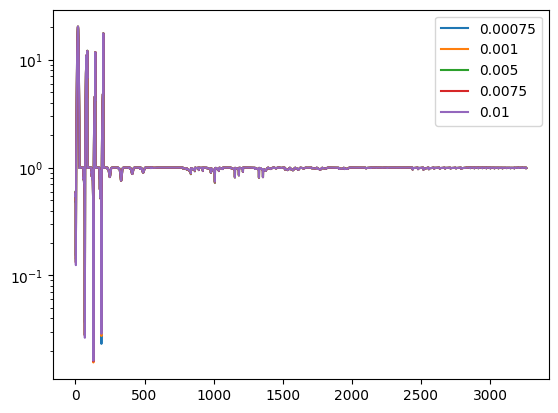

In [48]:
dref = np.diag(s.covariance.covmat)
for ddz in [0.00075, 0.001, 0.005, 0.0075, 0.01]:
    Tmat = np.load(f"./output/cls_FD_covG_T_p{ddz}.npz")["Tmat"]
    covf = np.load(f"./output/cls_FD_covG_covNzMarg_p{ddz}.npz")
    cov_dzmarg = covf['nz_marg']
    cov_dz = covf['cov_dz']
    
    d = np.diag(cov_dzmarg)
    plt.plot(np.abs(d/dref -1), label=ddz)
    
plt.yscale('log')
plt.legend()
plt.show()
plt.close()    

/tmp/ipykernel_3691/946042367.py:11: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(np.abs(d/dref -1), ls=ls, label=ddz)


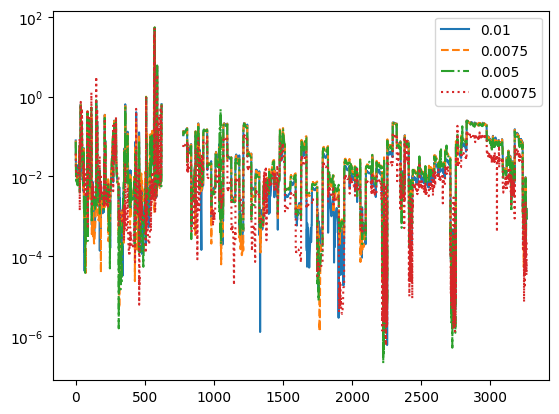

/tmp/ipykernel_3691/946042367.py:20: RuntimeWarning: invalid value encountered in true_divide
  ix = np.nanargmax(np.abs(d/dref -1))
/tmp/ipykernel_3691/946042367.py:24: RuntimeWarning: invalid value encountered in true_divide
  print(np.abs(d/dref - 1)[ix])


DataPoint(data_type='cl_00', tracers=('DESgc__4', 'DESgc__4'), value=3.134286613379034e-07, ell=2853.499999999979, window_ind=27, window=<sacc.windows.BandpowerWindow object at 0x7feccb7f3760>)
52.87693559054037


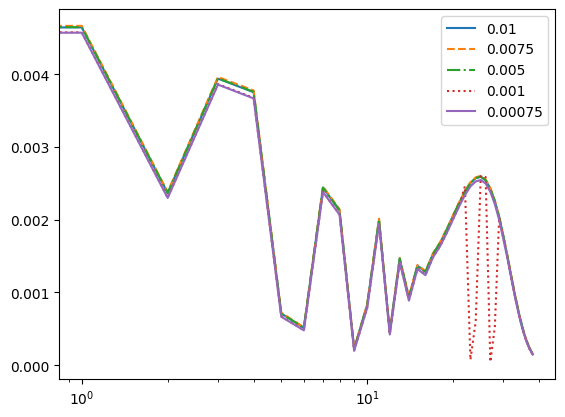

In [106]:
covf = np.load(f"./output/nz_shifted/cls_FD_covG_covNzMarg_p0.001.npz")
dref = np.diag(covf['nz_marg'])

for ls, ddz in zip(['-', '--', '-.', ':'], [0.00075, 0.005, 0.0075, 0.01][::-1]):
    Tmat = np.load(f"./output/nz_shifted/cls_FD_covG_T_p{ddz}.npz")["Tmat"]
    covf = np.load(f"./output/nz_shifted/cls_FD_covG_covNzMarg_p{ddz}.npz")
    cov_dzmarg = covf['nz_marg']
    cov_dz = covf['cov_dz']
    
    d = np.diag(cov_dzmarg)
    plt.plot(np.abs(d/dref -1), ls=ls, label=ddz)
    
plt.yscale('log')
plt.legend()
plt.show()
plt.close()   


# Plot ell, cl with errors for those with maximum deviation
ix = np.nanargmax(np.abs(d/dref -1))
dp = s.data[ix]

print(dp)
print(np.abs(d/dref - 1)[ix])
ell, cl, cov, ixs = s.get_ell_cl(dp.data_type, *dp.tracers,
                                 return_ind=True, return_cov=True)


for ls, ddz in zip(['-', '--', '-.', ':', '-'], [0.00075, 0.001, 0.005, 0.0075, 0.01][::-1]):
    covf = np.load(f"./output/nz_shifted/cls_FD_covG_covNzMarg_p{ddz}.npz")
    cov_dzmarg = covf['nz_marg']

    plt.plot(np.sqrt(np.diag(cov) +np.diag(cov_dzmarg)[ixs]) / np.sqrt(np.diag(cov)) - 1,
             ls=ls, label=ddz)

plt.semilogx()
plt.legend()
plt.show()
plt.close()

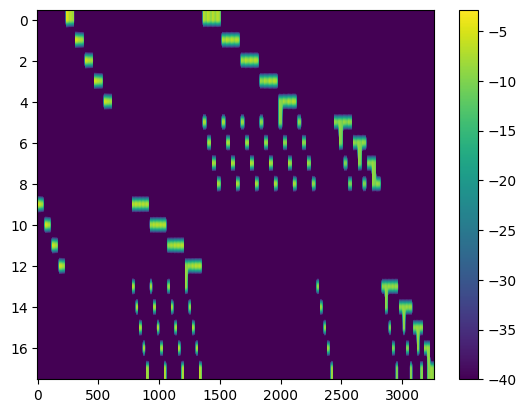

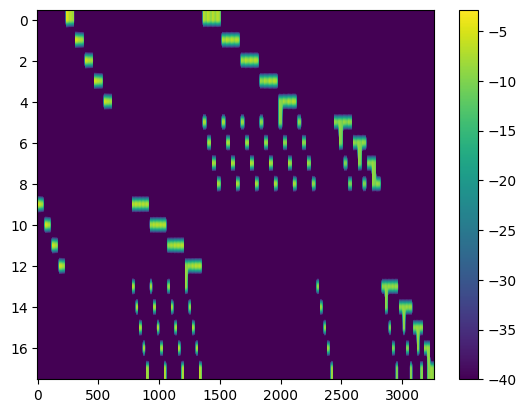

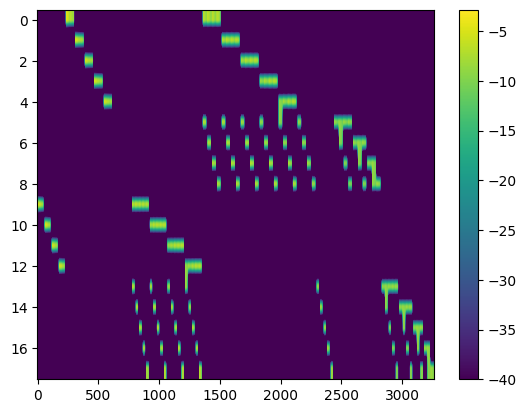

In [50]:
for ddz in [0.00075, 0.001, 0.005, 0.0075, 0.01]:
    Tmat = np.load(f"./output/cls_FD_covG_T_p{ddz}.npz")["Tmat"]
    plt.imshow(np.log10(np.abs(Tmat) + 1e-100), vmin=-40, aspect='auto')
    plt.colorbar()
    plt.show()

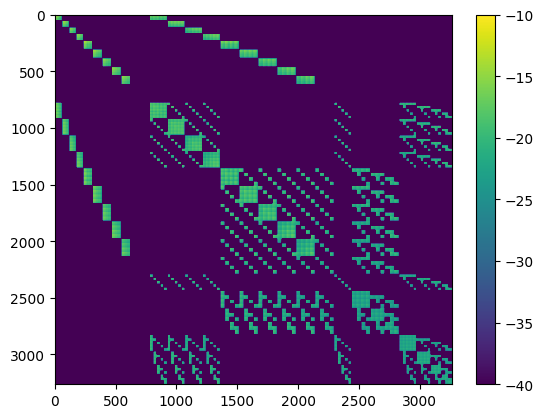

In [51]:
for ddz in [0.00075, 0.001, 0.005, 0.0075, 0.01]:
    covf = np.load(f"./output/cls_FD_covG_covNzMarg_p{ddz}.npz")
    cov_dzmarg = covf['nz_marg']
    plt.imshow(np.log10(np.abs(cov_dzmarg) + 1e-100), vmin=-40, aspect='auto')
    plt.colorbar()
    plt.show()

# With shifted N(z) [as it should]

/tmp/ipykernel_10294/472339941.py:11: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(np.abs(d/dref -1), ls=ls, label=ddz)


/tmp/ipykernel_10294/472339941.py:20: RuntimeWarning: invalid value encountered in true_divide
  ix = np.nanargmax(np.abs(d/dref -1))
/tmp/ipykernel_10294/472339941.py:24: RuntimeWarning: invalid value encountered in true_divide
  print(np.abs(d/dref - 1)[ix])


DataPoint(data_type='cl_00', tracers=('DESgc__3', 'PLAcv'), value=2.3316659496620386e-07, ell=134.50000000000003, window_ind=4, window=<sacc.windows.BandpowerWindow object at 0x7f1b362cb580>)
32.8819305336277


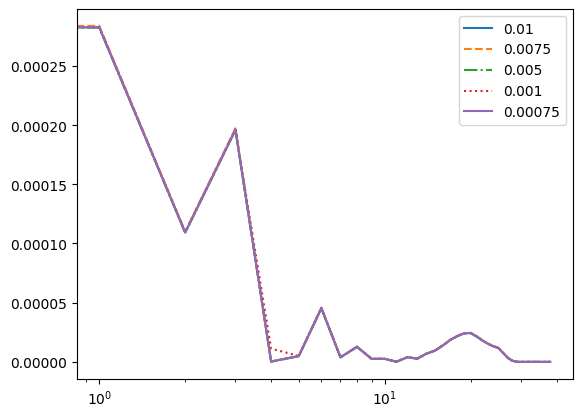

In [5]:
covf = np.load(f"./output/nz_shifted/cls_FD_covG_covNzMarg_p0.00075.npz")
dref = np.diag(covf['nz_marg'])

for ls, ddz in zip(['-', '--', '-.', ':'], [0.001, 0.005, 0.0075, 0.01][::-1]):
    Tmat = np.load(f"./output/nz_shifted/cls_FD_covG_T_p{ddz}.npz")["Tmat"]
    covf = np.load(f"./output/nz_shifted/cls_FD_covG_covNzMarg_p{ddz}.npz")
    cov_dzmarg = covf['nz_marg']
    cov_dz = covf['cov_dz']
    
    d = np.diag(cov_dzmarg)
    plt.plot(np.abs(d/dref -1), ls=ls, label=ddz)
    
plt.yscale('log')
plt.legend()
plt.show()
plt.close()   


# Plot ell, cl with errors for those with maximum deviation
ix = np.nanargmax(np.abs(d/dref -1))
dp = s.data[ix]

print(dp)
print(np.abs(d/dref - 1)[ix])
ell, cl, cov, ixs = s.get_ell_cl(dp.data_type, *dp.tracers,
                                 return_ind=True, return_cov=True)


for ls, ddz in zip(['-', '--', '-.', ':', '-'], [0.00075, 0.001, 0.005, 0.0075, 0.01][::-1]):
    covf = np.load(f"./output/nz_shifted/cls_FD_covG_covNzMarg_p{ddz}.npz")
    cov_dzmarg = covf['nz_marg']

    plt.plot(np.sqrt(np.diag(cov) + np.diag(cov_dzmarg)[ixs]) / np.sqrt(np.diag(cov)) - 1,
             ls=ls, label=ddz)

plt.semilogx()
plt.legend()
plt.show()
plt.close()

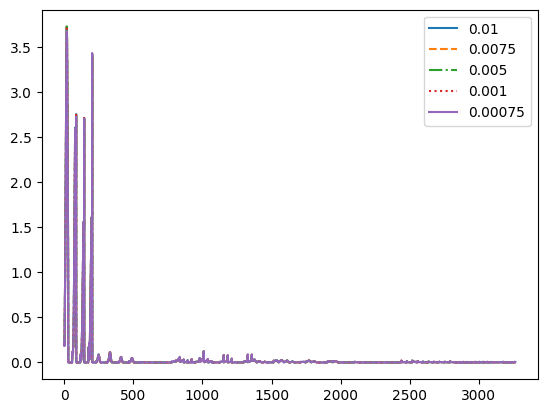

DataPoint(data_type='cl_00', tracers=('DECALS__0', 'DECALS__0'), value=9.156505345552841e-07, ell=909.0000000000018, window_ind=18, window=<sacc.windows.BandpowerWindow object at 0x7f1b366a9490>)
3.6727392047242136


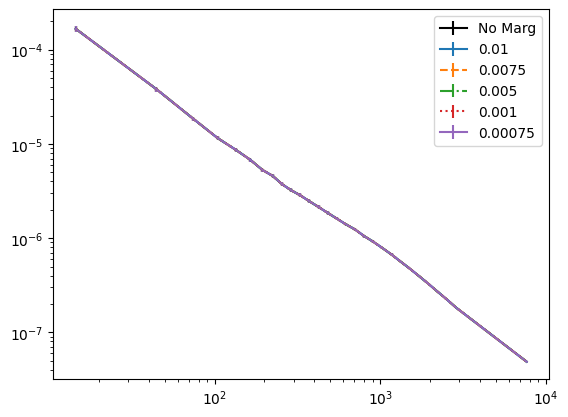

In [12]:
# Plot ell, cl with errors for those with maximum deviation
cov = s.covariance.covmat

for ls, ddz in zip(['-', '--', '-.', ':', '-'], [0.00075, 0.001, 0.005, 0.0075, 0.01][::-1]):
    covf = np.load(f"./output/nz_shifted/cls_FD_covG_covNzMarg_p{ddz}.npz")
    cov_dzmarg = covf['nz_marg']

    rdev = np.sqrt(np.diag(cov) +np.diag(cov_dzmarg)) / np.sqrt(np.diag(cov)) - 1
    plt.plot(rdev, ls=ls, label=ddz)

plt.legend()
plt.show()
plt.close()


# Plot ell, cl with errors for those with maximum deviation
ix = np.nanargmax(rdev)
dp = s.data[ix]

print(dp)
print(rdev[ix])
ell, cl, cov, ixs = s.get_ell_cl(dp.data_type, *dp.tracers,
                                 return_ind=True, return_cov=True)


for ls, ddz in zip(['-', '--', '-.', ':', '-'], [0.00075, 0.001, 0.005, 0.0075, 0.01][::-1]):
    covf = np.load(f"./output/nz_shifted/cls_FD_covG_covNzMarg_p{ddz}.npz")
    cov_dzmarg = covf['nz_marg']

    plt.plot(ell, np.sqrt(np.diag(cov) + np.diag(cov_dzmarg)[ixs]) / np.sqrt(np.diag(cov)) - 1,
             ls=ls, label=ddz)

plt.semilogx()
plt.legend()
plt.show()
plt.close()


# Check Cell with errorbars
plt.errorbar(ell, cl, yerr=np.sqrt(np.diag(cov)), c='k', ls='-', label='No Marg')

for ls, ddz in zip(['-', '--', '-.', ':', '-'], [0.00075, 0.001, 0.005, 0.0075, 0.01][::-1]):
    covf = np.load(f"./output/nz_shifted/cls_FD_covG_covNzMarg_p{ddz}.npz")
    cov_dzmarg = covf['nz_marg']

    plt.errorbar(ell, cl, yerr=np.sqrt(np.diag(cov) + np.diag(cov_dzmarg)[ixs]),
             ls=ls, label=ddz)

plt.loglog()
plt.legend()
plt.show()
plt.close()

In [3]:
s.get_ell_cl('cl_00', *("DECALS__0", "DECALS__0"))

(array([  14.5,   44.5,   74.5,  104.5,  134.5,  164.5,  194.5,  224.5,
         255.5,  290. ,  329.5,  374. ,  424.5,  482. ,  547. ,  621. ,
         705. ,  800.5,  909. , 1032. , 1172. , 1331. , 1511.5, 1716.5,
        1949. , 2213. , 2513. , 2872. , 7679.5]),
 array([1.66792150e-04, 3.81900647e-05, 1.84467478e-05, 1.15131390e-05,
        8.65490953e-06, 6.77779695e-06, 5.29907833e-06, 4.57597933e-06,
        3.74246685e-06, 3.22328624e-06, 2.84824151e-06, 2.46221111e-06,
        2.14286776e-06, 1.85555358e-06, 1.61364715e-06, 1.40277457e-06,
        1.23696400e-06, 1.05251381e-06, 9.15650535e-07, 7.85857983e-07,
        6.69943912e-07, 5.63073673e-07, 4.74719276e-07, 3.95958605e-07,
        3.29767130e-07, 2.72301057e-07, 2.25746220e-07, 1.83483801e-07,
        4.87815227e-08]))

In [4]:
s.get_ell_cl('cl_00', *("DESgc__0", "DESgc__0"))

(array([   14.5,    44.5,    74.5,   104.5,   134.5,   164.5,   194.5,
          224.5,   255.5,   290. ,   329.5,   374. ,   424.5,   482. ,
          547. ,   621. ,   705. ,   800.5,   909. ,  1032. ,  1172. ,
         1331. ,  1511.5,  1716.5,  1949. ,  2213. ,  2513. ,  2853.5,
         3240. ,  3679.5,  4178.5,  4745. ,  5388.5,  6119. ,  6948.5,
         7890.5,  8960. , 10174.5, 11554. ]),
 array([1.90242488e-04, 7.39127666e-05, 4.26125289e-05, 2.22965965e-05,
        2.17688011e-05, 1.52300112e-05, 1.63969264e-05, 1.23156478e-05,
        9.51081548e-06, 8.40034607e-06, 6.92999430e-06, 6.76561795e-06,
        7.14638170e-06, 5.87420322e-06, 5.34102745e-06, 4.08318724e-06,
        3.57253970e-06, 3.26155827e-06, 3.04322422e-06, 2.64679345e-06,
        2.44815769e-06, 2.10616125e-06, 1.90846553e-06, 1.62320698e-06,
        1.48097033e-06, 1.38239234e-06, 1.07409195e-06, 9.45678480e-07,
        7.60214616e-07, 6.77334640e-07, 5.56702590e-07, 4.69198747e-07,
        3.72876040e-07,

# Final file with covG + dz and mMarg covariances

In [12]:
sfinal = sacc.Sacc.load_fits("./cls_FD_covG_dzMarg_mMarg.fits")
sdz = sacc.Sacc.load_fits("./output/nz_shifted/cls_FD_covG_cls_NzMarg_cov_p0.00075.fits")
sm = sacc.Sacc.load_fits("./cls_FD_covG_mMarg.fits")
for dt in ['cl_0b', 'cl_eb', 'cl_be', 'cl_bb']:
    sm.remove_selection(data_type=dt)

In [16]:
assert sfinal.get_tracer_combinations() == s.get_tracer_combinations()
covdz = np.load(f"./output/nz_shifted/cls_FD_covG_covNzMarg_p0.00075.npz")["nz_marg"]

plt.imshow(np.log10(np.abs(sfinal.covariance.covmat - covdz - sm.covariance.covmat)))
plt.colorbar()
plt.show()

/tmp/ipykernel_14810/2959581906.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(np.abs(sfinal.covariance.covmat - covdz - sm.covariance.covmat)))


/tmp/ipykernel_14810/1058362453.py:11: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(np.abs(errm/err - 1)))


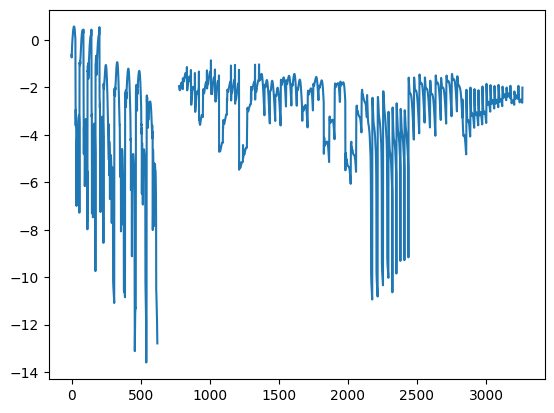

In [21]:
cov = s.covariance.covmat
covm = sfinal.covariance.covmat

err = np.sqrt(np.diag(cov))
errm = np.sqrt(np.diag(covm))

plt.plot(errm/err - 1)
plt.show()
plt.close()

plt.plot(np.log10(np.abs(errm/err - 1)))
plt.show()
plt.close()